## CNN examples for course Deep Learning Fundamentals and Basic Tools

We will use the CIFAR-10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.utils.vis_utils import plot_model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Utility functions:

In [ ]:
def plot_training_curves(hd):
  nepochs = len(hd['acc'])
  epochs = range(1, nepochs+1)

  plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  plt.plot(epochs, hd['acc'], "r", label="train")
  plt.plot(epochs, hd['val_acc'], "b", label="valid")
  plt.grid(True)
  plt.xlabel("epoch")
  plt.ylabel("accuracy")
  plt.title("Accuracy")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, hd['loss'], "r", label="train")
  plt.plot(epochs, hd['val_loss'], "b", label="valid")
  plt.grid(True)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("Loss")
  plt.legend()

  plt.show()

In [ ]:
def plot_predictions(model, images, images_orig, labels, class_names):
  predictions = model.predict(images)
  num_images = images.shape[0]

  for i in range(num_images):
    plt.figure(figsize=(16, 3))

    plt.subplot(1, 2, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_orig[i])
    plt.title("%d [%s]" % (labels[i], class_names[labels[i]]))

    plt.subplot(1, 2, 2)
    plt.bar(np.arange(10), predictions[i])
    plt.xticks(ticks=np.arange(10), labels=class_names)
    plt.grid(True)
              
    plt.show()

Data loading, the dataset is included in Keras (https://keras.io/api/datasets/cifar10/):

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(train_images.shape)
print(train_labels.shape)
for t in train_labels[:10]:
  print(t[0], class_names[t[0]])

print(test_images.shape)
print(test_labels.shape)
for t in test_labels[:10]:
  print(t[0], class_names[t[0]])

(50000, 32, 32, 3)
(50000, 1)
6 frog
9 truck
9 truck
4 deer
1 automobile
1 automobile
2 bird
7 horse
8 ship
3 cat
(10000, 32, 32, 3)
(10000, 1)
3 cat
8 ship
8 ship
0 airplane
6 frog
6 frog
1 automobile
6 frog
3 cat
1 automobile


Let us visualize some of the images:

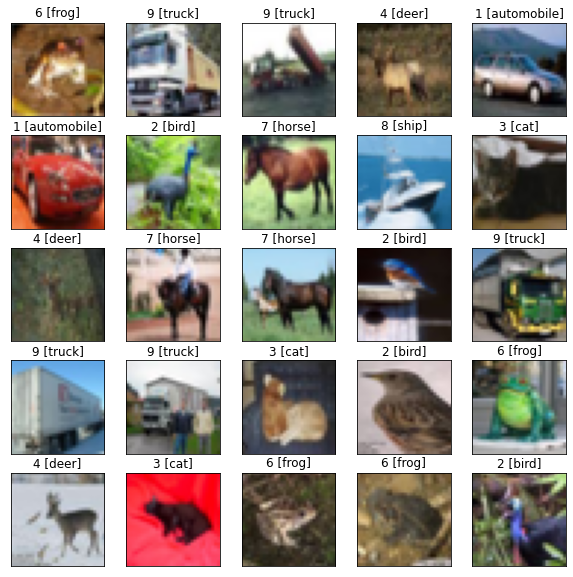

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.title("%d [%s]" % (train_labels[i][0], class_names[train_labels[i][0]]))

Normalization:

In [ ]:
train_images_orig = train_images
test_images_orig = test_images
mean_img = train_images.mean(axis=0)
train_images = train_images - mean_img
test_images = test_images - mean_img

One-hot classes:

In [ ]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, 10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, 10)

## Naive approach: Fully connected network

Model definition:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 3072)              0         
_________________________________________________________________
hidden (Dense)               (None, 128)               393344    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
None


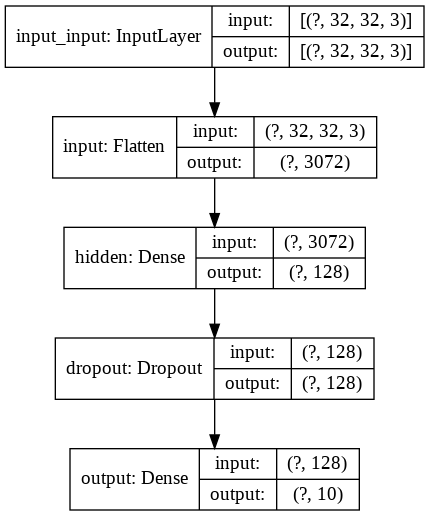

In [ ]:
K.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3), name="input"))
model.add(keras.layers.Dense(128, activation="relu", name="hidden"))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Dense(10, activation="softmax", name="output"))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

Compilation:

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Training:

In [ ]:
nepochs = 50
history = model.fit(train_images, train_labels_one_hot, 
                    epochs=nepochs, 
                    validation_data=(test_images, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 [==============================] - 1s 13ms/step - loss: 70.1447 - acc: 0.2650 - val_loss: 30.5757 - val_acc: 0.3307
Epoch 2/50
50/50 [==============================] - 0s 10ms/step - loss: 35.0006 - acc: 0.3117 - val_loss: 24.2840 - val_acc: 0.3576
Epoch 3/50
50/50 [==============================] - 0s 9ms/step - loss: 26.2471 - acc: 0.3338 - val_loss: 18.4301 - val_acc: 0.3553
Epoch 4/50
50/50 [==============================] - 0s 10ms/step - loss: 20.3713 - acc: 0.3485 - val_loss: 14.3223 - val_acc: 0.3706
Epoch 5/50
50/50 [==============================] - 0s 9ms/step - loss: 15.7196 - acc: 0.3625 - val_loss: 11.4789 - val_acc: 0.3710
Epoch 6/50
50/50 [==============================] - 0s 9ms/step - loss: 12.2119 - acc: 0.3734 - val_loss: 8.6483 - val_acc: 0.4057
Epoch 7/50
50/50 [==============================] - 0s 9ms/step - loss: 9.2494 - acc: 0.3850 - val_loss: 6.9368 - val_acc: 0.4019
Epoch 8/50
50/50 [==============================] - 0s 9ms/step - loss: 7.17

Plots:

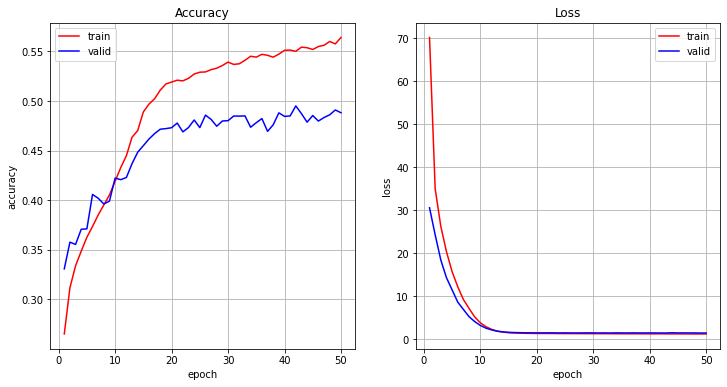

In [ ]:
plot_training_curves(history.history)

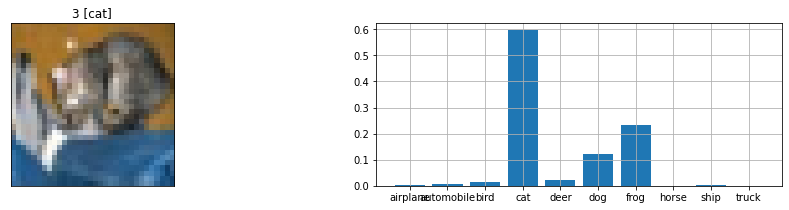

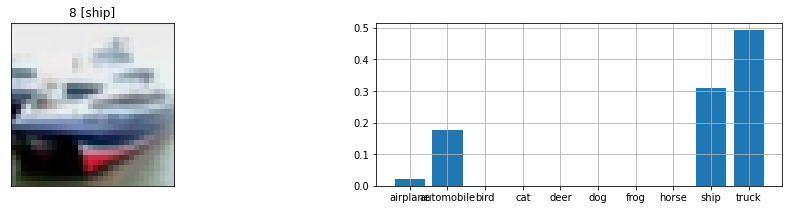

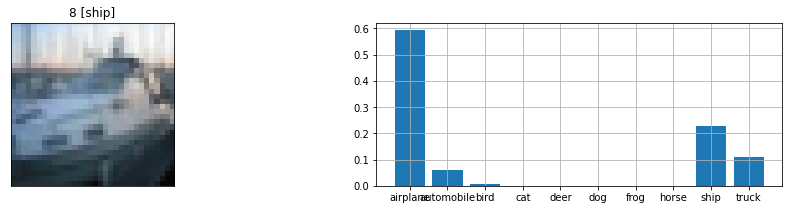

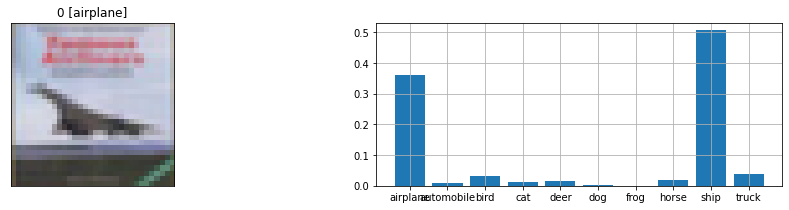

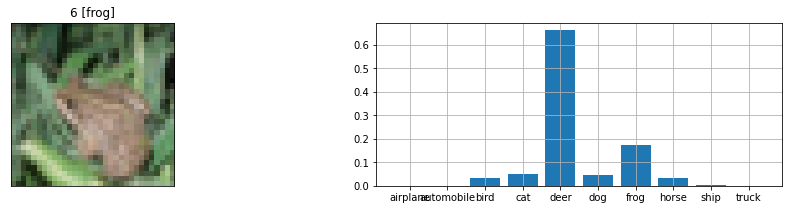

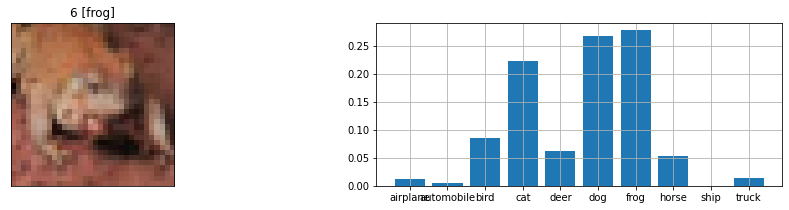

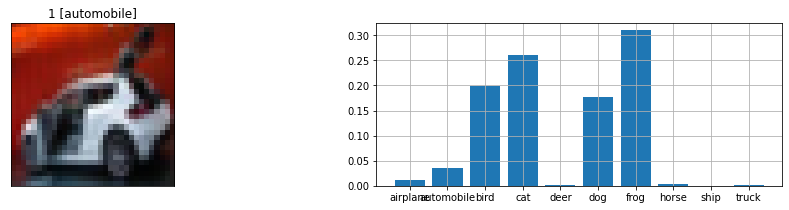

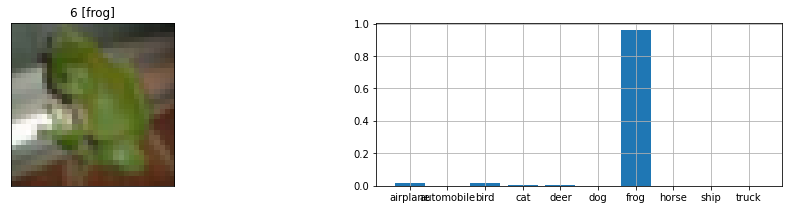

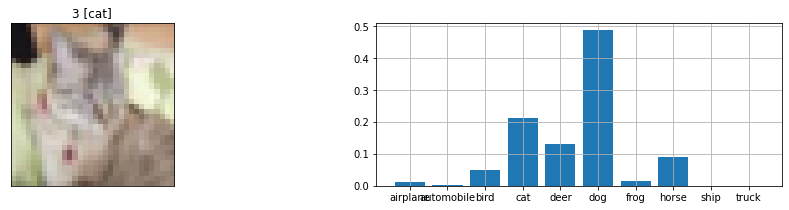

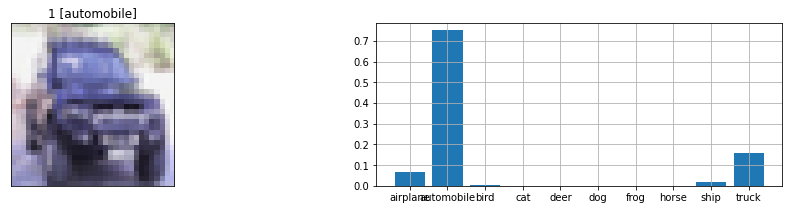

In [ ]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## CNN built from scratch:

Model definition:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

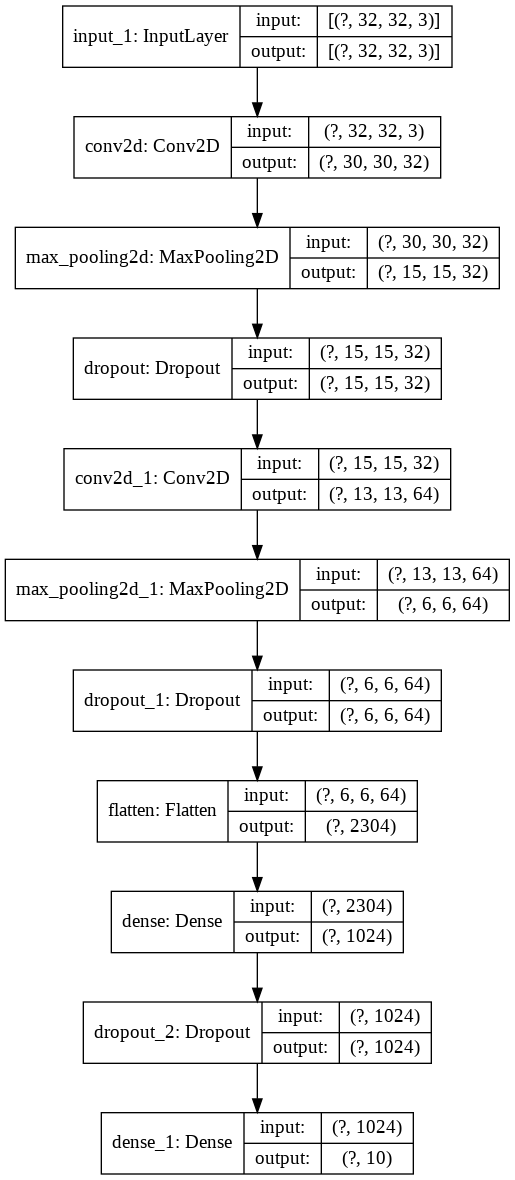

In [ ]:
K.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

Compilation:

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Training:

In [ ]:
nepochs = 50
history = model.fit(train_images, train_labels_one_hot, 
                    epochs=nepochs, 
                    validation_data=(test_images, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 [==============================] - 2s 44ms/step - loss: 16.8722 - acc: 0.1441 - val_loss: 2.2650 - val_acc: 0.1445
Epoch 2/50
50/50 [==============================] - 2s 39ms/step - loss: 2.1820 - acc: 0.1987 - val_loss: 2.1914 - val_acc: 0.1824
Epoch 3/50
50/50 [==============================] - 2s 40ms/step - loss: 2.0876 - acc: 0.2340 - val_loss: 2.1277 - val_acc: 0.2054
Epoch 4/50
50/50 [==============================] - 2s 39ms/step - loss: 1.9900 - acc: 0.2711 - val_loss: 1.9892 - val_acc: 0.2810
Epoch 5/50
50/50 [==============================] - 2s 39ms/step - loss: 1.9093 - acc: 0.2996 - val_loss: 1.8742 - val_acc: 0.3325
Epoch 6/50
50/50 [==============================] - 2s 40ms/step - loss: 1.8438 - acc: 0.3263 - val_loss: 1.8047 - val_acc: 0.3614
Epoch 7/50
50/50 [==============================] - 2s 40ms/step - loss: 1.7774 - acc: 0.3519 - val_loss: 1.7058 - val_acc: 0.3944
Epoch 8/50
50/50 [==============================] - 2s 39ms/step - loss: 1.7197 - 

Plots:

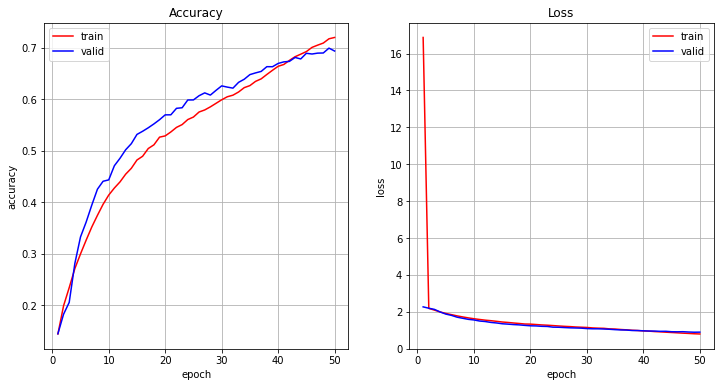

In [ ]:
plot_training_curves(history.history)

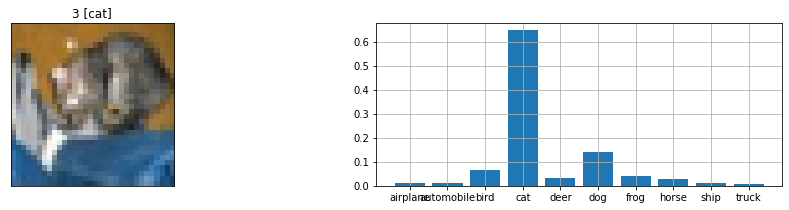

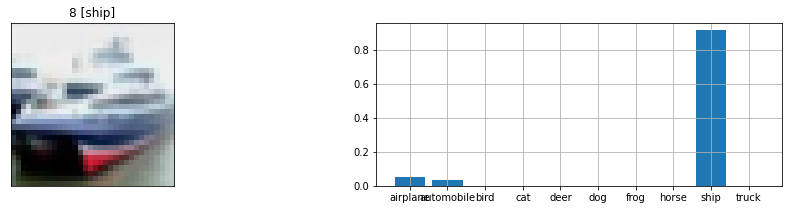

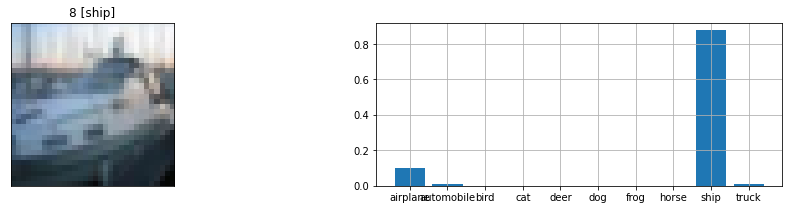

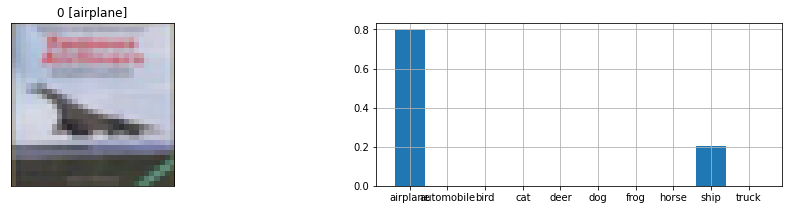

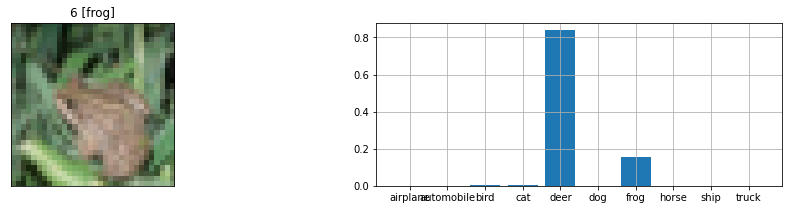

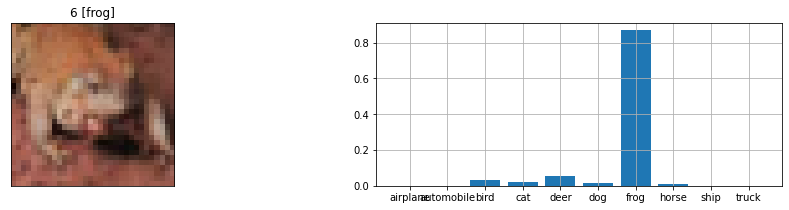

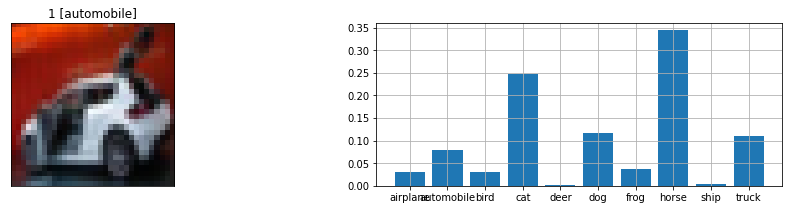

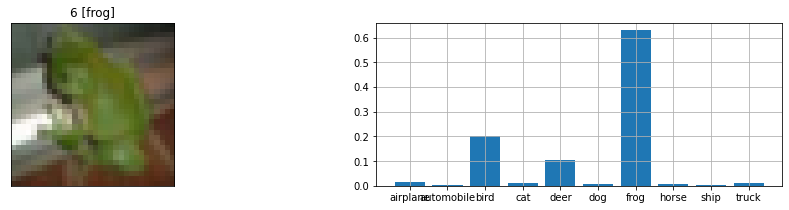

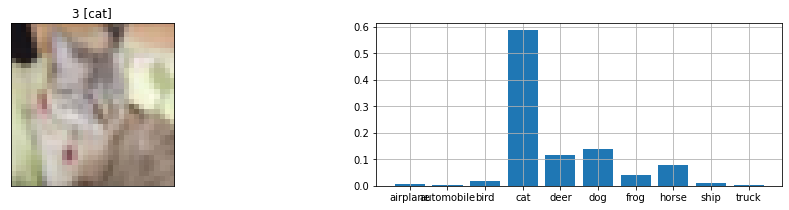

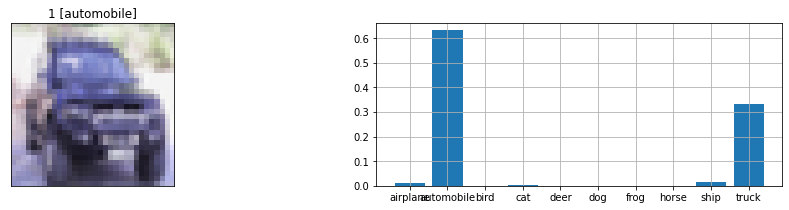

In [ ]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## A more complex model that overfits the data

Model definition:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

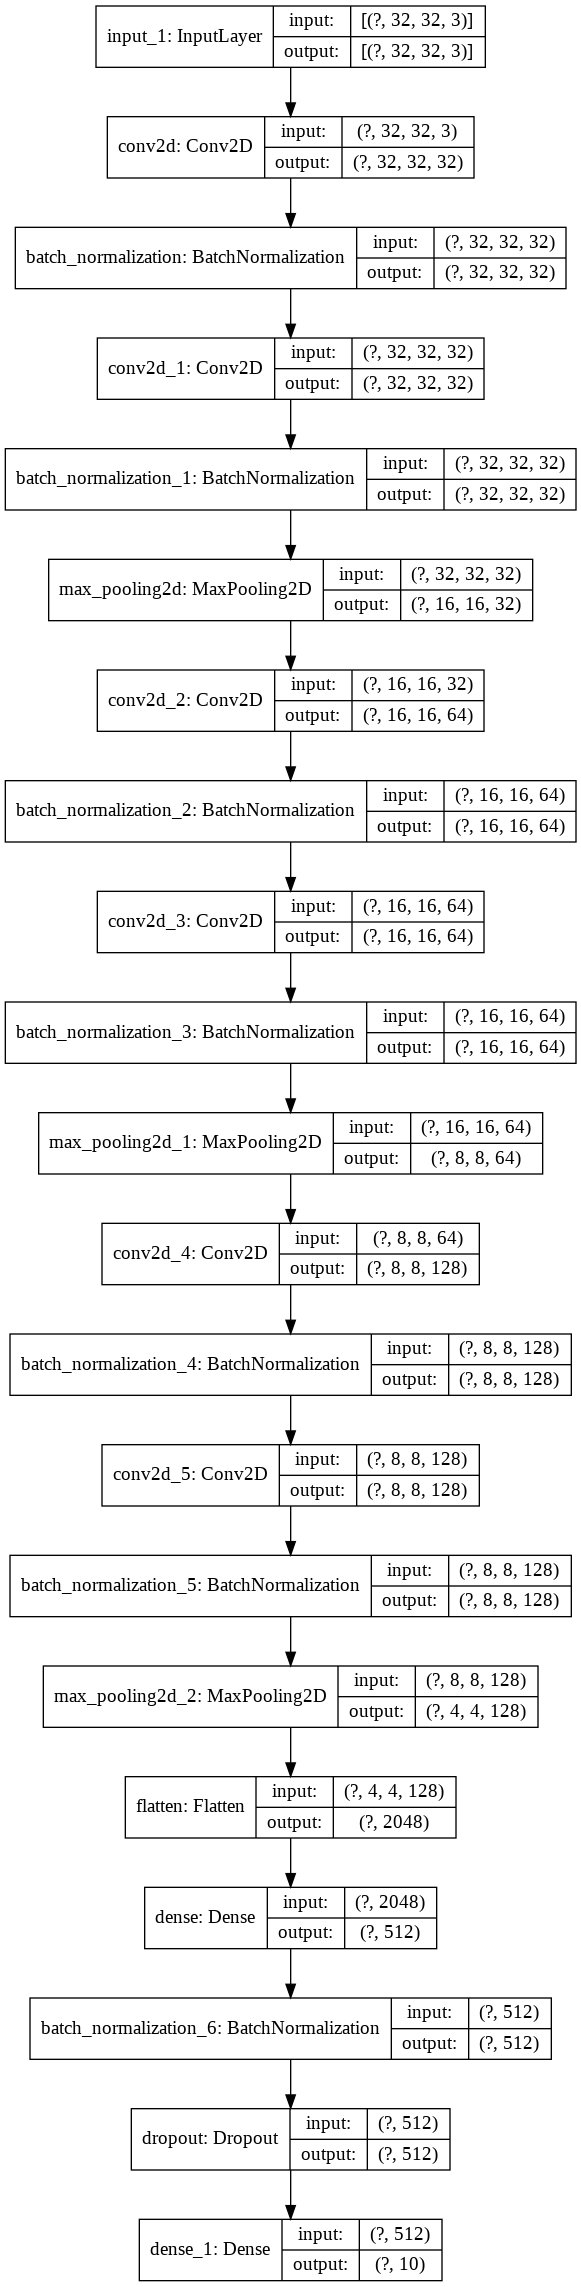

In [ ]:
K.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))   

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))   

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))  

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

Compilation:

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Training:

In [ ]:
nepochs = 50
history = model.fit(train_images, train_labels_one_hot, 
                    epochs=nepochs, 
                    validation_data=(test_images, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/50
50/50 [==============================] - 6s 125ms/step - loss: 1.8105 - acc: 0.4419 - val_loss: 2.2234 - val_acc: 0.2789
Epoch 2/50
50/50 [==============================] - 6s 121ms/step - loss: 1.1184 - acc: 0.6149 - val_loss: 1.5242 - val_acc: 0.4311
Epoch 3/50
50/50 [==============================] - 6s 121ms/step - loss: 0.8875 - acc: 0.6870 - val_loss: 1.1644 - val_acc: 0.5777
Epoch 4/50
50/50 [==============================] - 6s 121ms/step - loss: 0.7329 - acc: 0.7415 - val_loss: 1.0294 - val_acc: 0.6274
Epoch 5/50
50/50 [==============================] - 6s 122ms/step - loss: 0.6159 - acc: 0.7843 - val_loss: 0.8841 - val_acc: 0.6897
Epoch 6/50
50/50 [==============================] - 6s 124ms/step - loss: 0.5148 - acc: 0.8202 - val_loss: 0.8304 - val_acc: 0.7172
Epoch 7/50
50/50 [==============================] - 6s 124ms/step - loss: 0.4190 - acc: 0.8548 - val_loss: 0.7859 - val_acc: 0.7366
Epoch 8/50
50/50 [==============================] - 6s 123ms/step - loss: 0.

Plots:

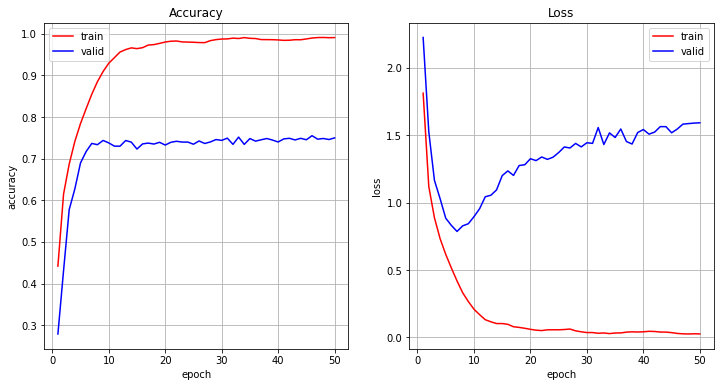

In [ ]:
plot_training_curves(history.history)

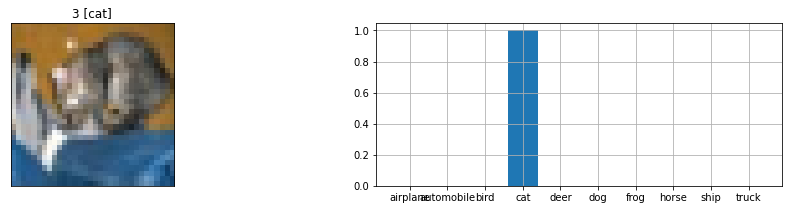

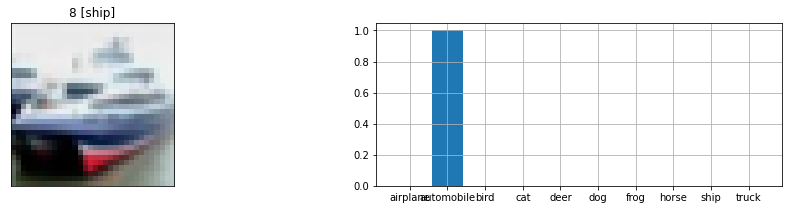

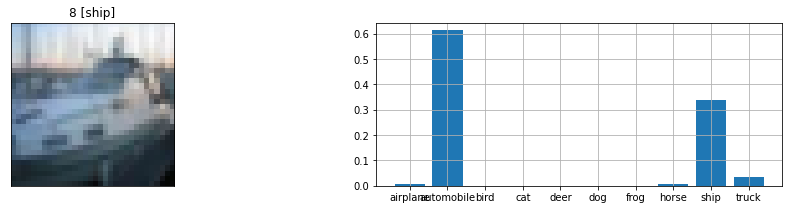

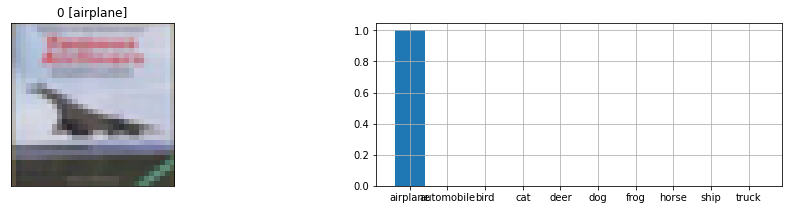

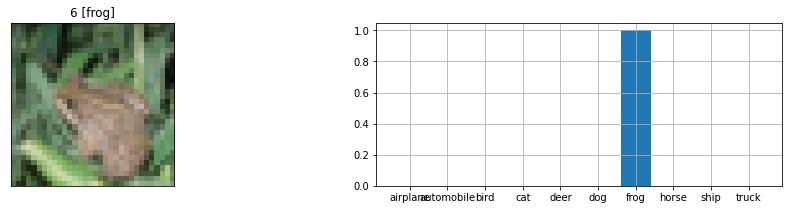

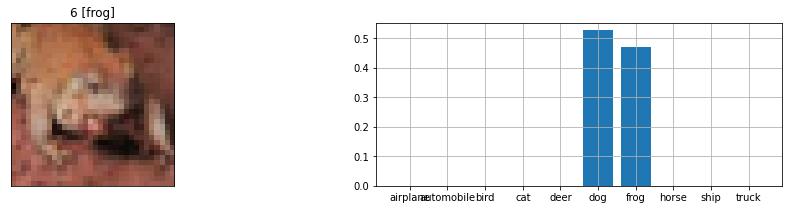

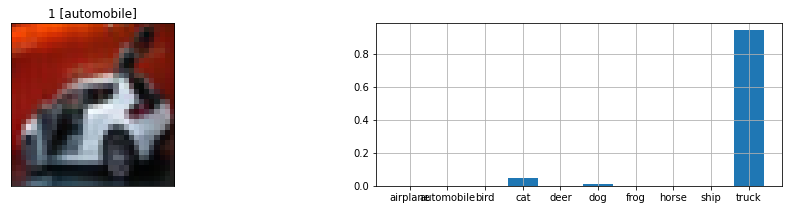

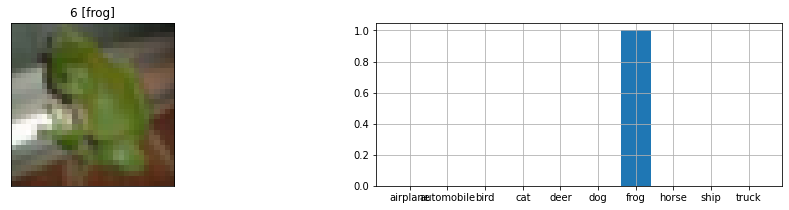

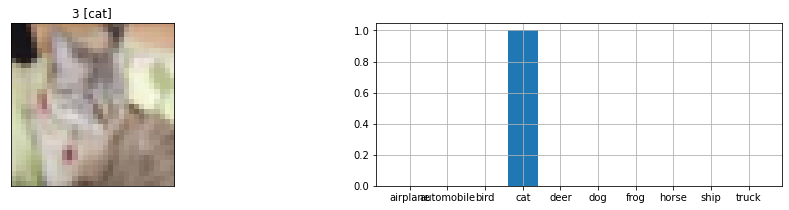

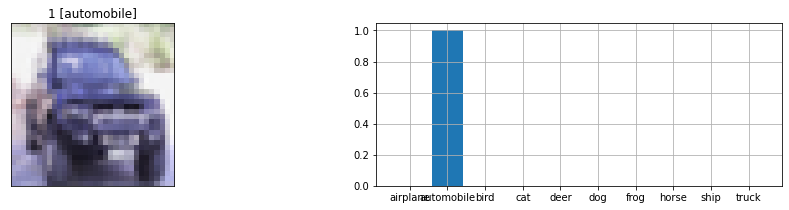

In [ ]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## Data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             rotation_range=15, 
                             horizontal_flip=True)

In [ ]:
iter = datagen.flow(train_images_orig[:10], train_labels[:10], batch_size=10)

Plot original images:

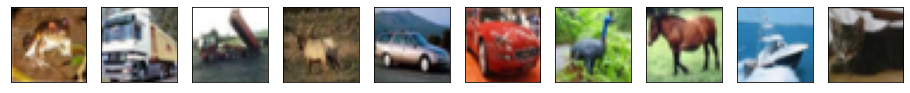

In [ ]:
plt.figure(figsize=(16, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images_orig[i])

Plot randomly augmented images:

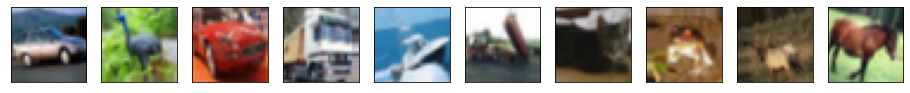

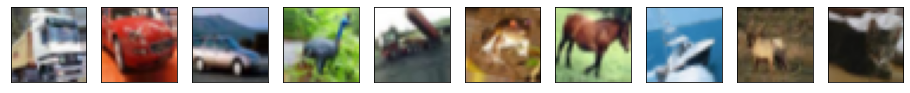

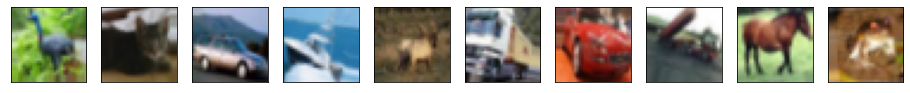

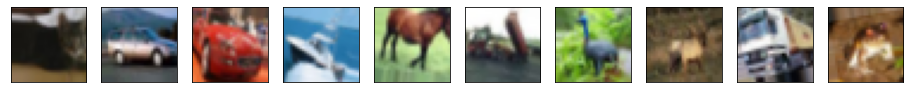

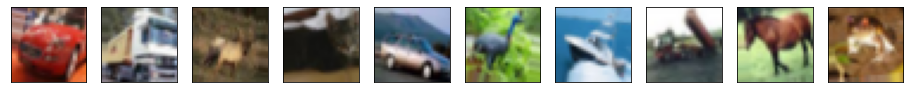

In [ ]:
for k in range(5):
  im, lbl = iter.next()
  plt.figure(figsize=(16, 3))
  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(im[i], dtype=np.int))

Let us see if augmentation improves our model:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

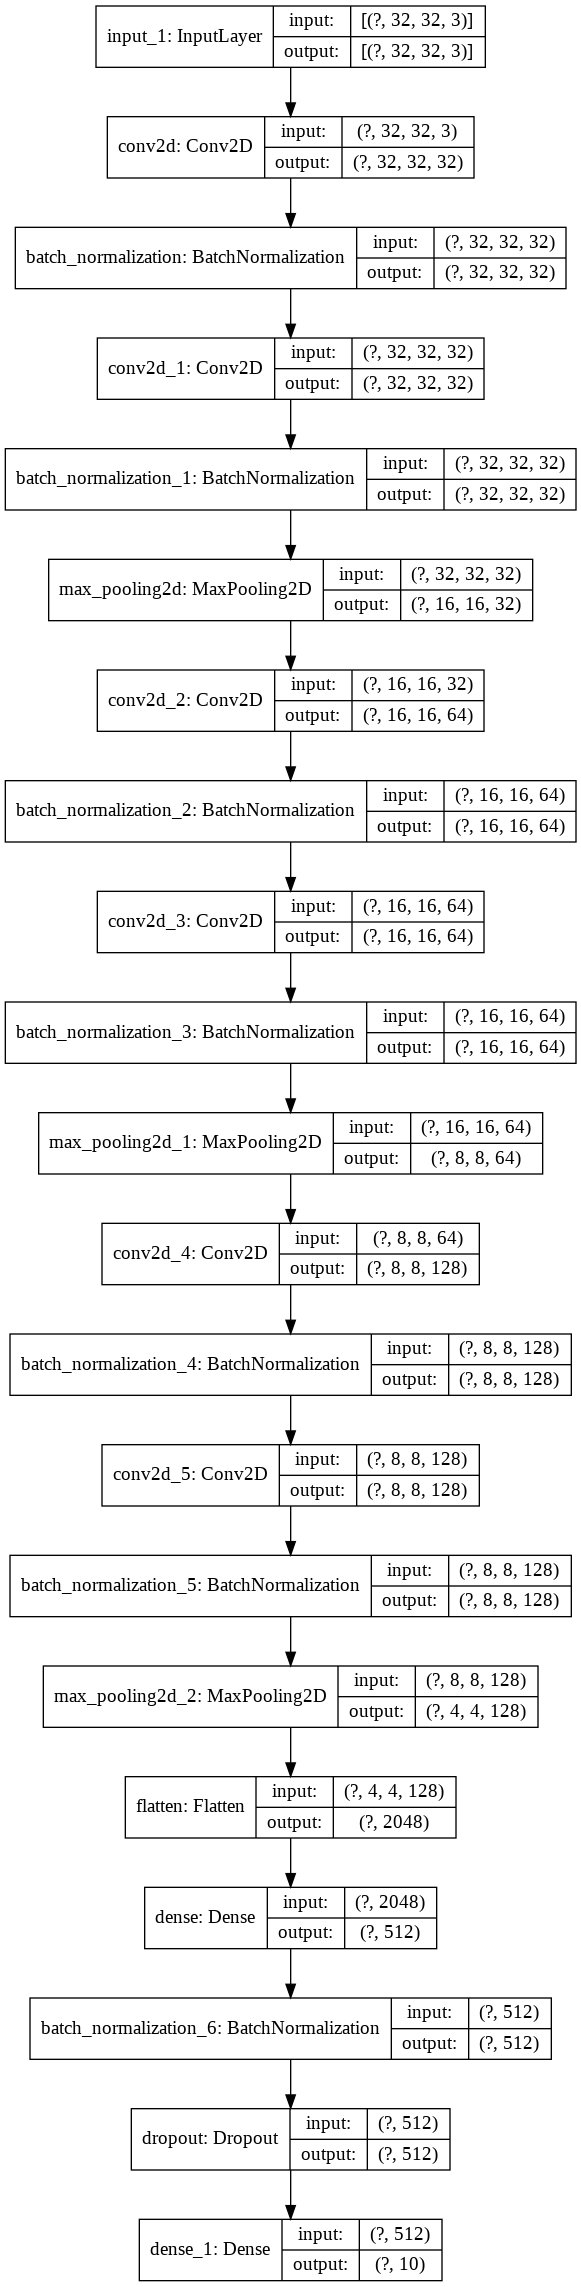

In [ ]:
K.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))   

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))   

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))  

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

Compilation:

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])

Iterator that generates batches:

In [ ]:
iter = datagen.flow(train_images, train_labels_one_hot, batch_size=1000)

Training:

In [ ]:
nepochs = 50
history = model.fit(iter, 
                    epochs=nepochs, 
                    steps_per_epoch=50,
                    validation_data=(test_images, test_labels_one_hot))

Epoch 1/50
50/50 [==============================] - 22s 433ms/step - loss: 1.9379 - acc: 0.4023 - val_loss: 1.6580 - val_acc: 0.4209
Epoch 2/50
50/50 [==============================] - 21s 426ms/step - loss: 1.3233 - acc: 0.5438 - val_loss: 1.3848 - val_acc: 0.4924
Epoch 3/50
50/50 [==============================] - 21s 423ms/step - loss: 1.1168 - acc: 0.6091 - val_loss: 1.1836 - val_acc: 0.5798
Epoch 4/50
50/50 [==============================] - 21s 423ms/step - loss: 0.9816 - acc: 0.6542 - val_loss: 1.0466 - val_acc: 0.6247
Epoch 5/50
50/50 [==============================] - 21s 423ms/step - loss: 0.8889 - acc: 0.6859 - val_loss: 0.9483 - val_acc: 0.6721
Epoch 6/50
50/50 [==============================] - 21s 428ms/step - loss: 0.8261 - acc: 0.7091 - val_loss: 0.8497 - val_acc: 0.7035
Epoch 7/50
50/50 [==============================] - 21s 421ms/step - loss: 0.7725 - acc: 0.7266 - val_loss: 0.7918 - val_acc: 0.7282
Epoch 8/50
50/50 [==============================] - 21s 425ms/step - 

Plots:

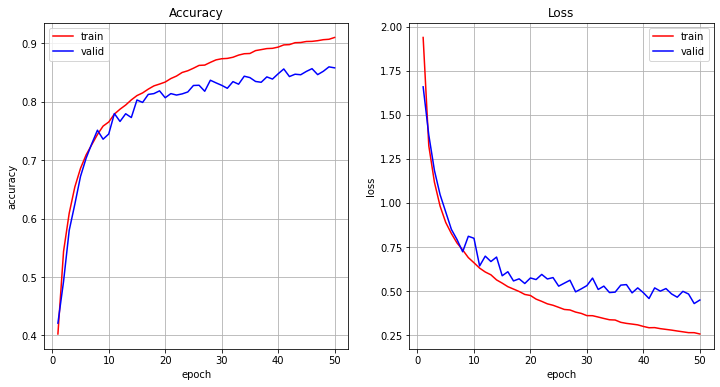

In [ ]:
plot_training_curves(history.history)

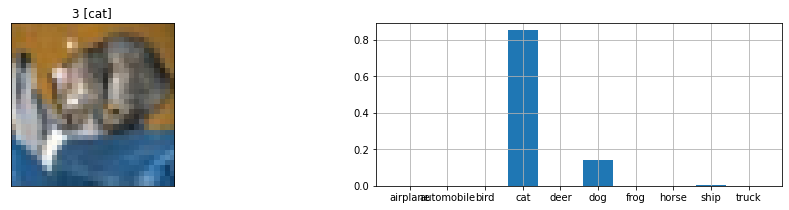

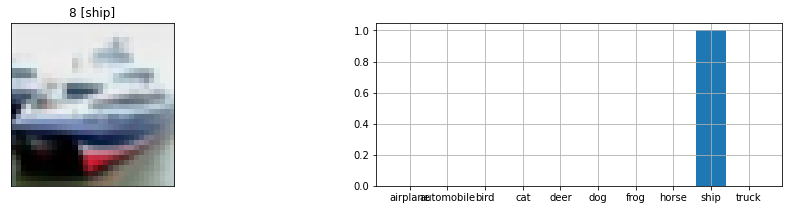

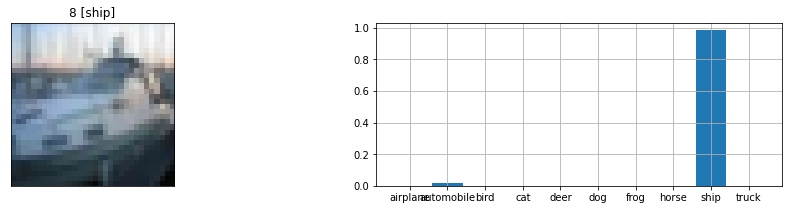

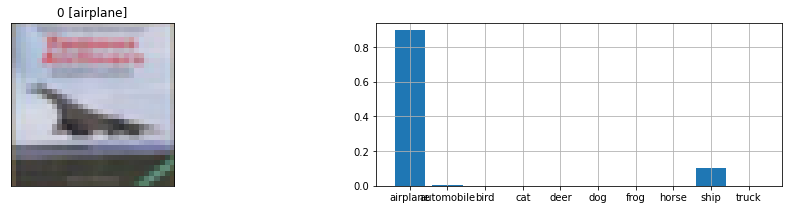

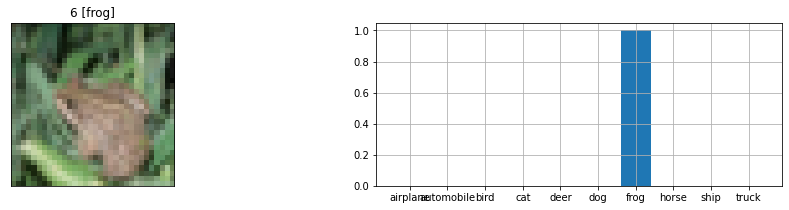

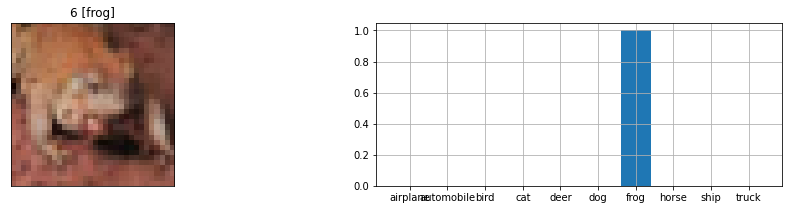

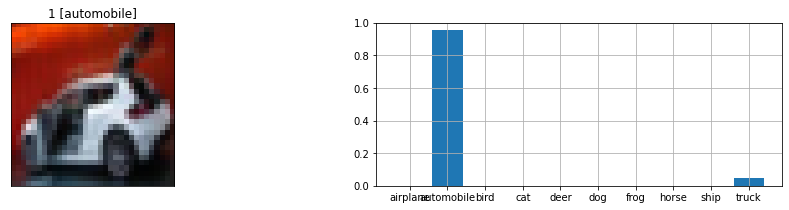

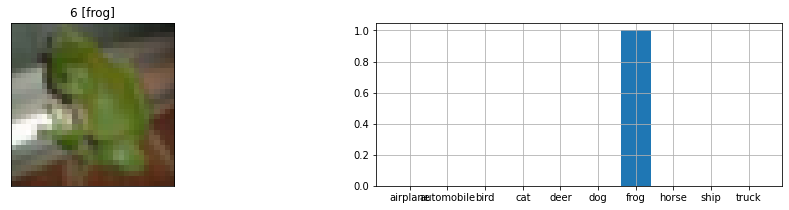

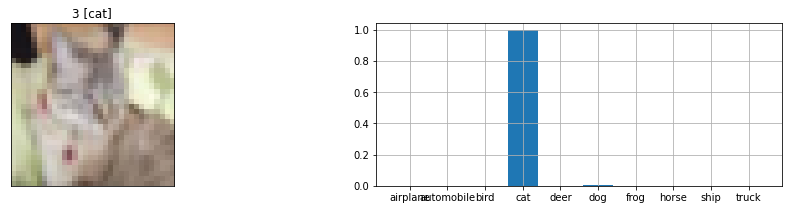

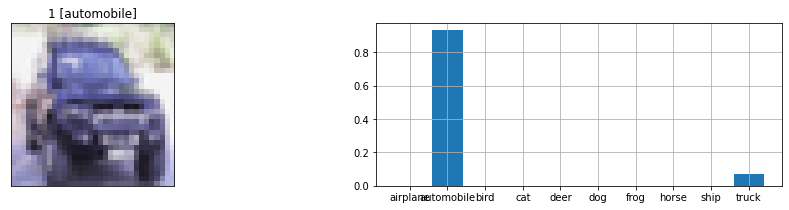

In [ ]:
plot_predictions(model, test_images[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## Use of a pre-trained model

We will use a VGG16 network to extract the image features, and then build a fully connected network to classify the images using these features.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

from PIL import Image

vgg = VGG16(weights='imagenet', include_top=False, input_shape=(60, 60, 3))

x_train = np.array([np.array(Image.fromarray(x).resize(size=(60, 60))) for x in train_images_orig])
x_test = np.array([np.array(Image.fromarray(x).resize(size=(60, 60))) for x in test_images_orig])

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

features_train = vgg.predict(x_train).reshape((50000, 512))
features_test = vgg.predict(x_test).reshape((10000, 512))

In [ ]:
print(features_train.shape)
print(features_test.shape)

(50000, 512)
(10000, 512)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden-1 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout-1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden-2 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout-2 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 396,554
Trainable params: 396,554
Non-trainable params: 0
_________________________________________________________________
None


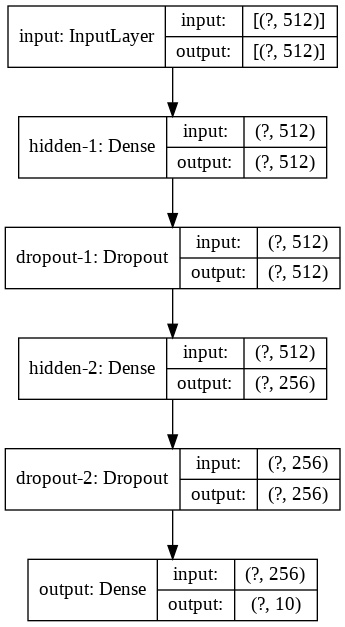

In [ ]:
K.clear_session()

model = keras.Sequential()
model.add(keras.layers.Input(shape=(512,), name="input"))
model.add(keras.layers.Dense(512, activation="relu", name="hidden-1"))
model.add(keras.layers.Dropout(rate=0.8, name="dropout-1"))
model.add(keras.layers.Dense(256, activation="relu", name="hidden-2"))
model.add(keras.layers.Dropout(rate=0.8, name="dropout-2"))
model.add(keras.layers.Dense(10, activation="softmax", name="output"))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
nepochs = 100
history = model.fit(features_train, train_labels_one_hot, 
                    epochs=nepochs, 
                    validation_data=(features_test, test_labels_one_hot),
                    batch_size=1000)

Epoch 1/100
50/50 [==============================] - 0s 7ms/step - loss: 9.6897 - acc: 0.1545 - val_loss: 1.9905 - val_acc: 0.4185
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 2.7447 - acc: 0.2144 - val_loss: 1.9173 - val_acc: 0.4744
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 2.0446 - acc: 0.3109 - val_loss: 1.6712 - val_acc: 0.5404
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 1.7693 - acc: 0.4020 - val_loss: 1.4720 - val_acc: 0.5851
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 1.5949 - acc: 0.4658 - val_loss: 1.3571 - val_acc: 0.6048
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 1.4923 - acc: 0.5038 - val_loss: 1.2663 - val_acc: 0.6272
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 1.4131 - acc: 0.5345 - val_loss: 1.1931 - val_acc: 0.6378
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 1.3497 - a

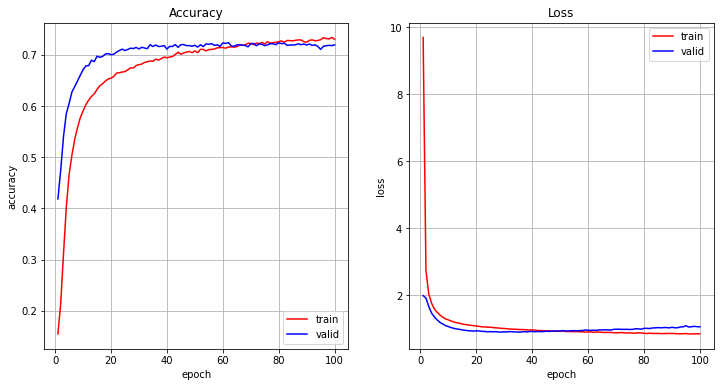

In [ ]:
plot_training_curves(history.history)

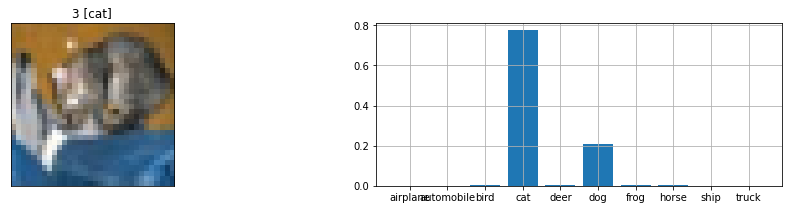

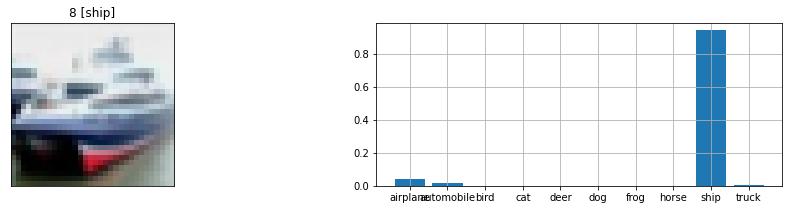

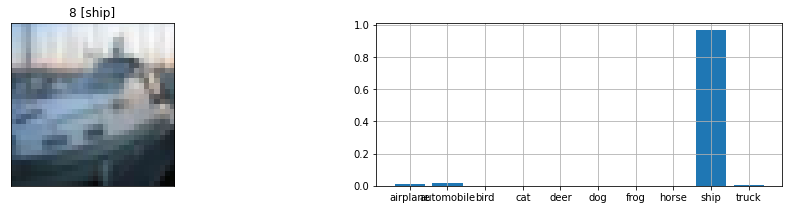

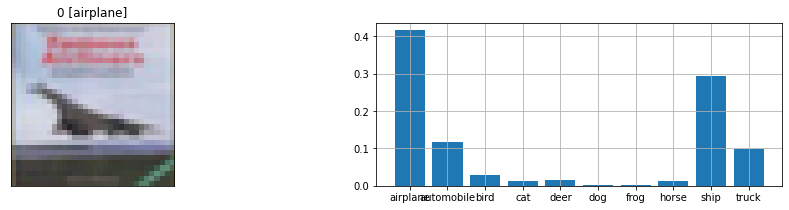

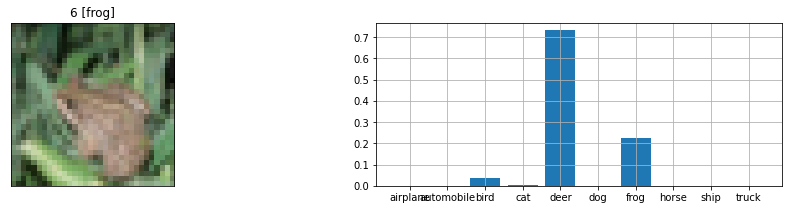

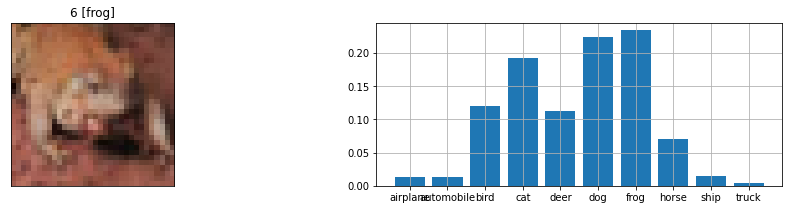

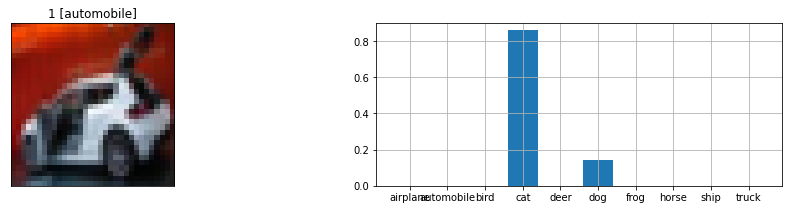

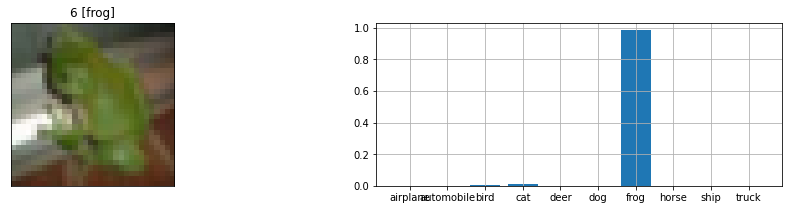

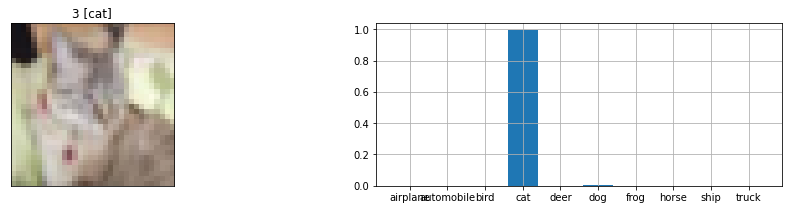

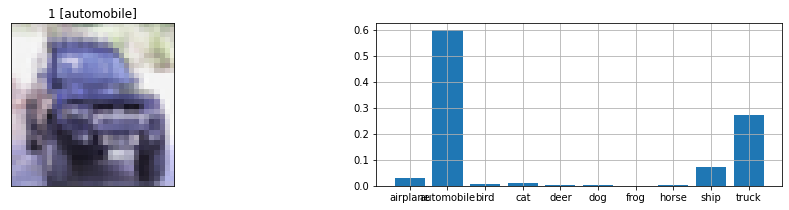

In [ ]:
plot_predictions(model, features_test[:10], test_images_orig[:10], test_labels[:10, 0], class_names)

## Use of a pre-trained model (II)

We will use a VGG16 network to extract the image features, and then build a fully connected network to classify the images using these features.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

from PIL import Image

x_train = np.array([np.array(Image.fromarray(x).resize(size=(60, 60))) for x in train_images_orig])
x_test = np.array([np.array(Image.fromarray(x).resize(size=(60, 60))) for x in test_images_orig])

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 60, 60, 3)
(10000, 60, 60, 3)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 60, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 60, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 60, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 30, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 30, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 15, 15, 128)      

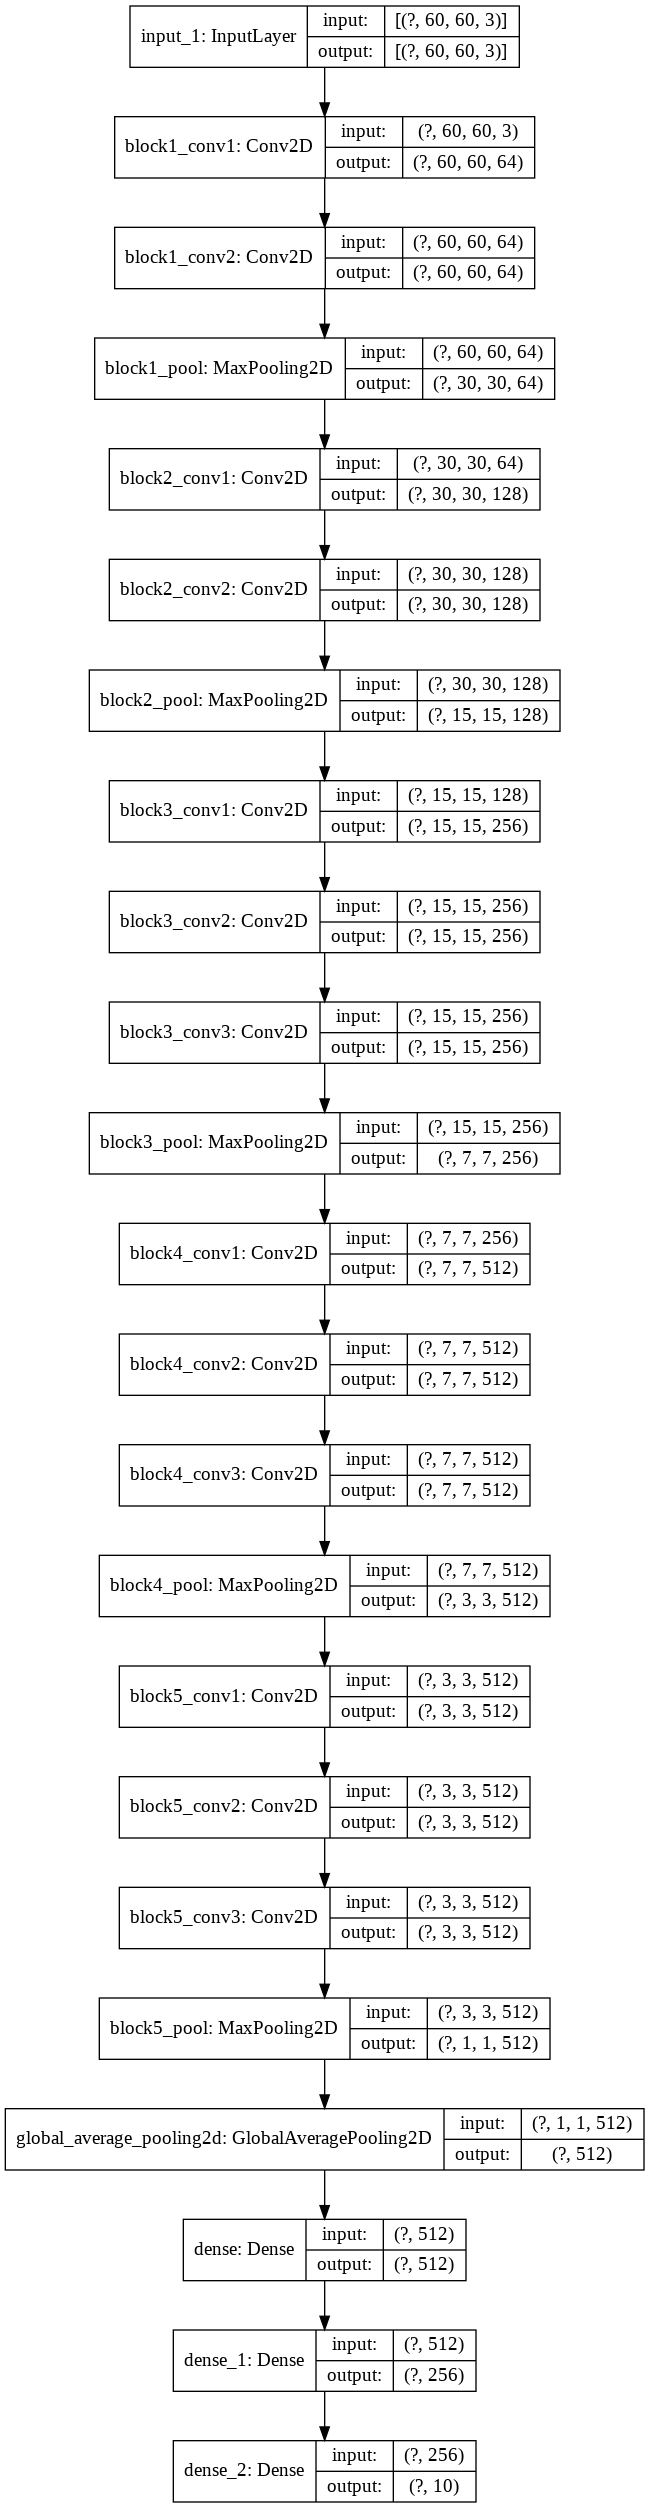

In [ ]:
K.clear_session()

vgg = VGG16(weights='imagenet', include_top=False, input_shape=(60, 60, 3))

for layer in vgg.layers:
  layer.trainable = False
    
x = vgg.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation="relu")(x)
#x = keras.layers.Dropout(rate=0.8)(x)
x = keras.layers.Dense(256, activation="relu")(x)
#x = keras.layers.Dropout(rate=0.8)(x)

pred = keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(vgg.input, pred)

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
iter = datagen.flow(x_train, train_labels_one_hot, batch_size=1000)

In [ ]:
nepochs = 50
history = model.fit(iter, 
                    epochs=nepochs, 
                    steps_per_epoch=50,
                    validation_data=(x_test, test_labels_one_hot))

Epoch 1/50
50/50 [==============================] - 53s 1s/step - loss: 2.5491 - acc: 0.4820 - val_loss: 1.3079 - val_acc: 0.5649
Epoch 2/50
50/50 [==============================] - 53s 1s/step - loss: 1.1824 - acc: 0.6000 - val_loss: 1.0334 - val_acc: 0.6461
Epoch 3/50
50/50 [==============================] - 53s 1s/step - loss: 1.0393 - acc: 0.6416 - val_loss: 0.9449 - val_acc: 0.6751
Epoch 4/50
50/50 [==============================] - 53s 1s/step - loss: 0.9697 - acc: 0.6657 - val_loss: 0.9168 - val_acc: 0.6898
Epoch 5/50
50/50 [==============================] - 54s 1s/step - loss: 0.9163 - acc: 0.6813 - val_loss: 0.8903 - val_acc: 0.6948
Epoch 6/50
50/50 [==============================] - 53s 1s/step - loss: 0.8788 - acc: 0.6954 - val_loss: 0.8798 - val_acc: 0.7022
Epoch 7/50
50/50 [==============================] - 53s 1s/step - loss: 0.8600 - acc: 0.7020 - val_loss: 0.8598 - val_acc: 0.7068
Epoch 8/50
50/50 [==============================] - 53s 1s/step - loss: 0.8229 - acc: 0.71

Plots:

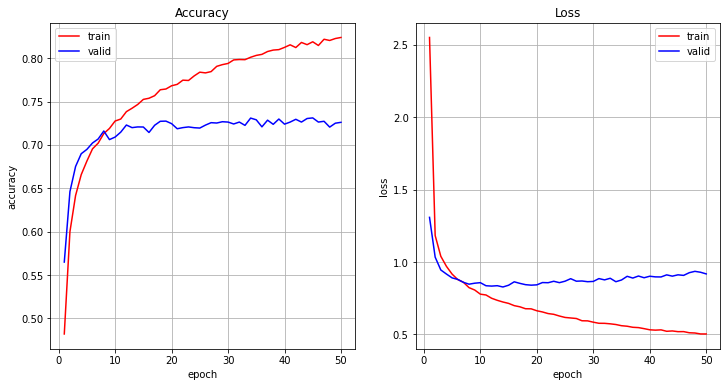

In [ ]:
plot_training_curves(history.history)